In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Loading the data using Pandas
df=pd.read_csv(r'D:\harshal documents\upgrad\assignment Lead score\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [126]:
#gives entire information that needs to be inspected.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [127]:
#To get the idea of how the table looks like we can use head() command.
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [129]:
#gives the no. of rows and columns.
df.shape

(9240, 37)

In [130]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Cleaning the dataframe

In [131]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [132]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [133]:
df1.shape

(9240, 32)

In [134]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df1 = df1.replace('select',np.nan)

In [135]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [136]:
# Removing all the columns that are not required and have more than 40% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'],axis=1)
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Interested in other courses,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Ringing,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Ringing,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Will revert after reading the email,Select,Mumbai,No,Modified


In [137]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [138]:
#Removing few more not required columns
df2 = df2.drop(['Lead Profile','Tags','City','How did you hear about X Education'],axis=1)
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [139]:
#Columns which are important and have more number of null values, replacing the NaN values with 'not provided'.

df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [140]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [141]:
df2["Country"].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [142]:
#categorising values in Country column, as Not provided count is more and single values of other countries.
#categorising as India/outside India/Not provided
def ct(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "Not Provided"
    else:
        category = "Outside India"
    return category

df2['Country'] = df2.apply(lambda x:ct(x['Country']), axis = 1)
df2['Country'].value_counts()

India            6492
Not Provided     2461
Outside India     287
Name: Country, dtype: int64

In [143]:
df2['Country'].value_counts()

India            6492
Not Provided     2461
Outside India     287
Name: Country, dtype: int64

In [144]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [145]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [146]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [147]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [148]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [47]:
df2.shape

(9240, 23)

In [151]:
# Removing Id values since they are unique for everyone
df_F = df3.drop('Prospect ID',axis=1)
df_F.shape

(9074, 22)

In [153]:
df_F.shape

(9074, 22)

## EDA

### Univariate Analysis

In [154]:
df_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

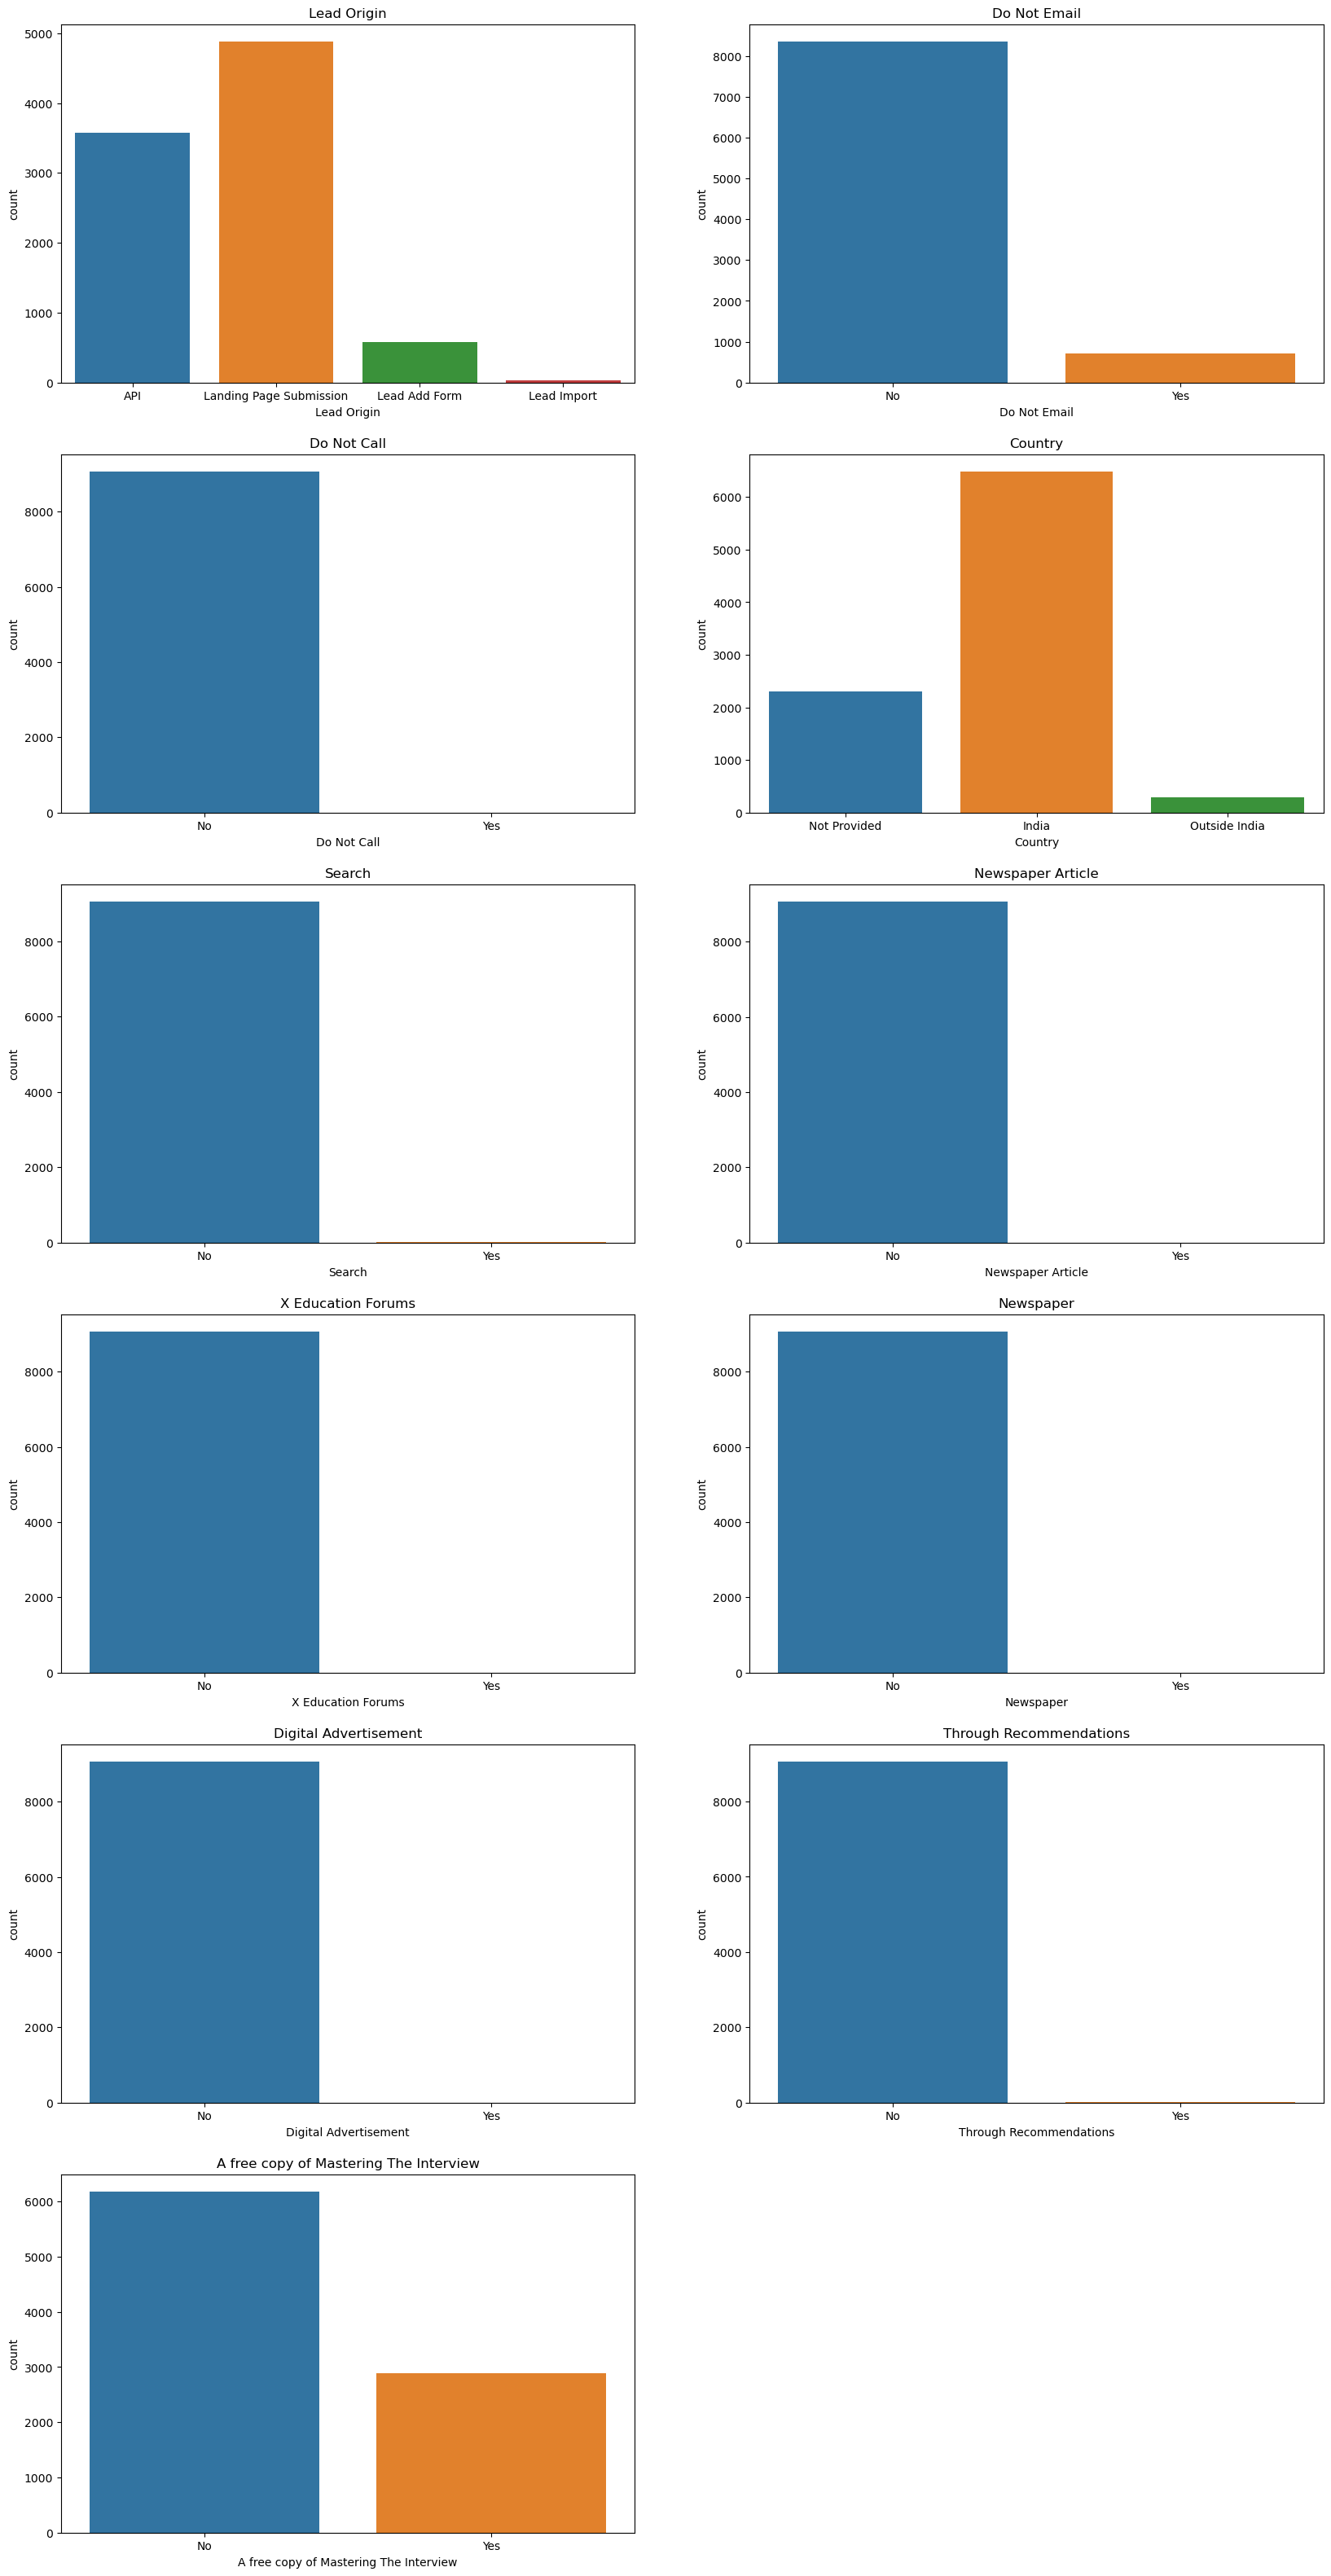

In [155]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_F,x='Lead Origin')
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_F,x='Do Not Email')
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_F,x='Do Not Call')
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_F,x='Country')
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_F,x='Search')
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_F,x='Newspaper Article')
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_F,x='X Education Forums')
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_F,x='Newspaper')
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_F,x='Digital Advertisement')
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_F,x='Through Recommendations')
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_F,x='A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview')


plt.show()

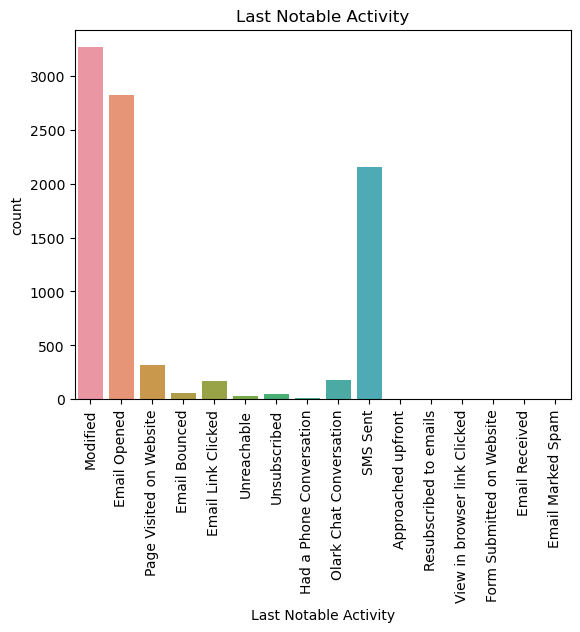

In [156]:

sns.countplot(df_F,x='Last Notable Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

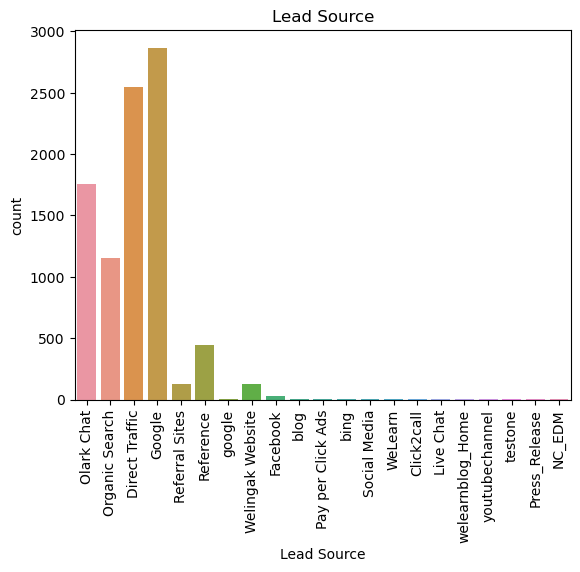

In [157]:
sns.countplot(df_F,x='Lead Source').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

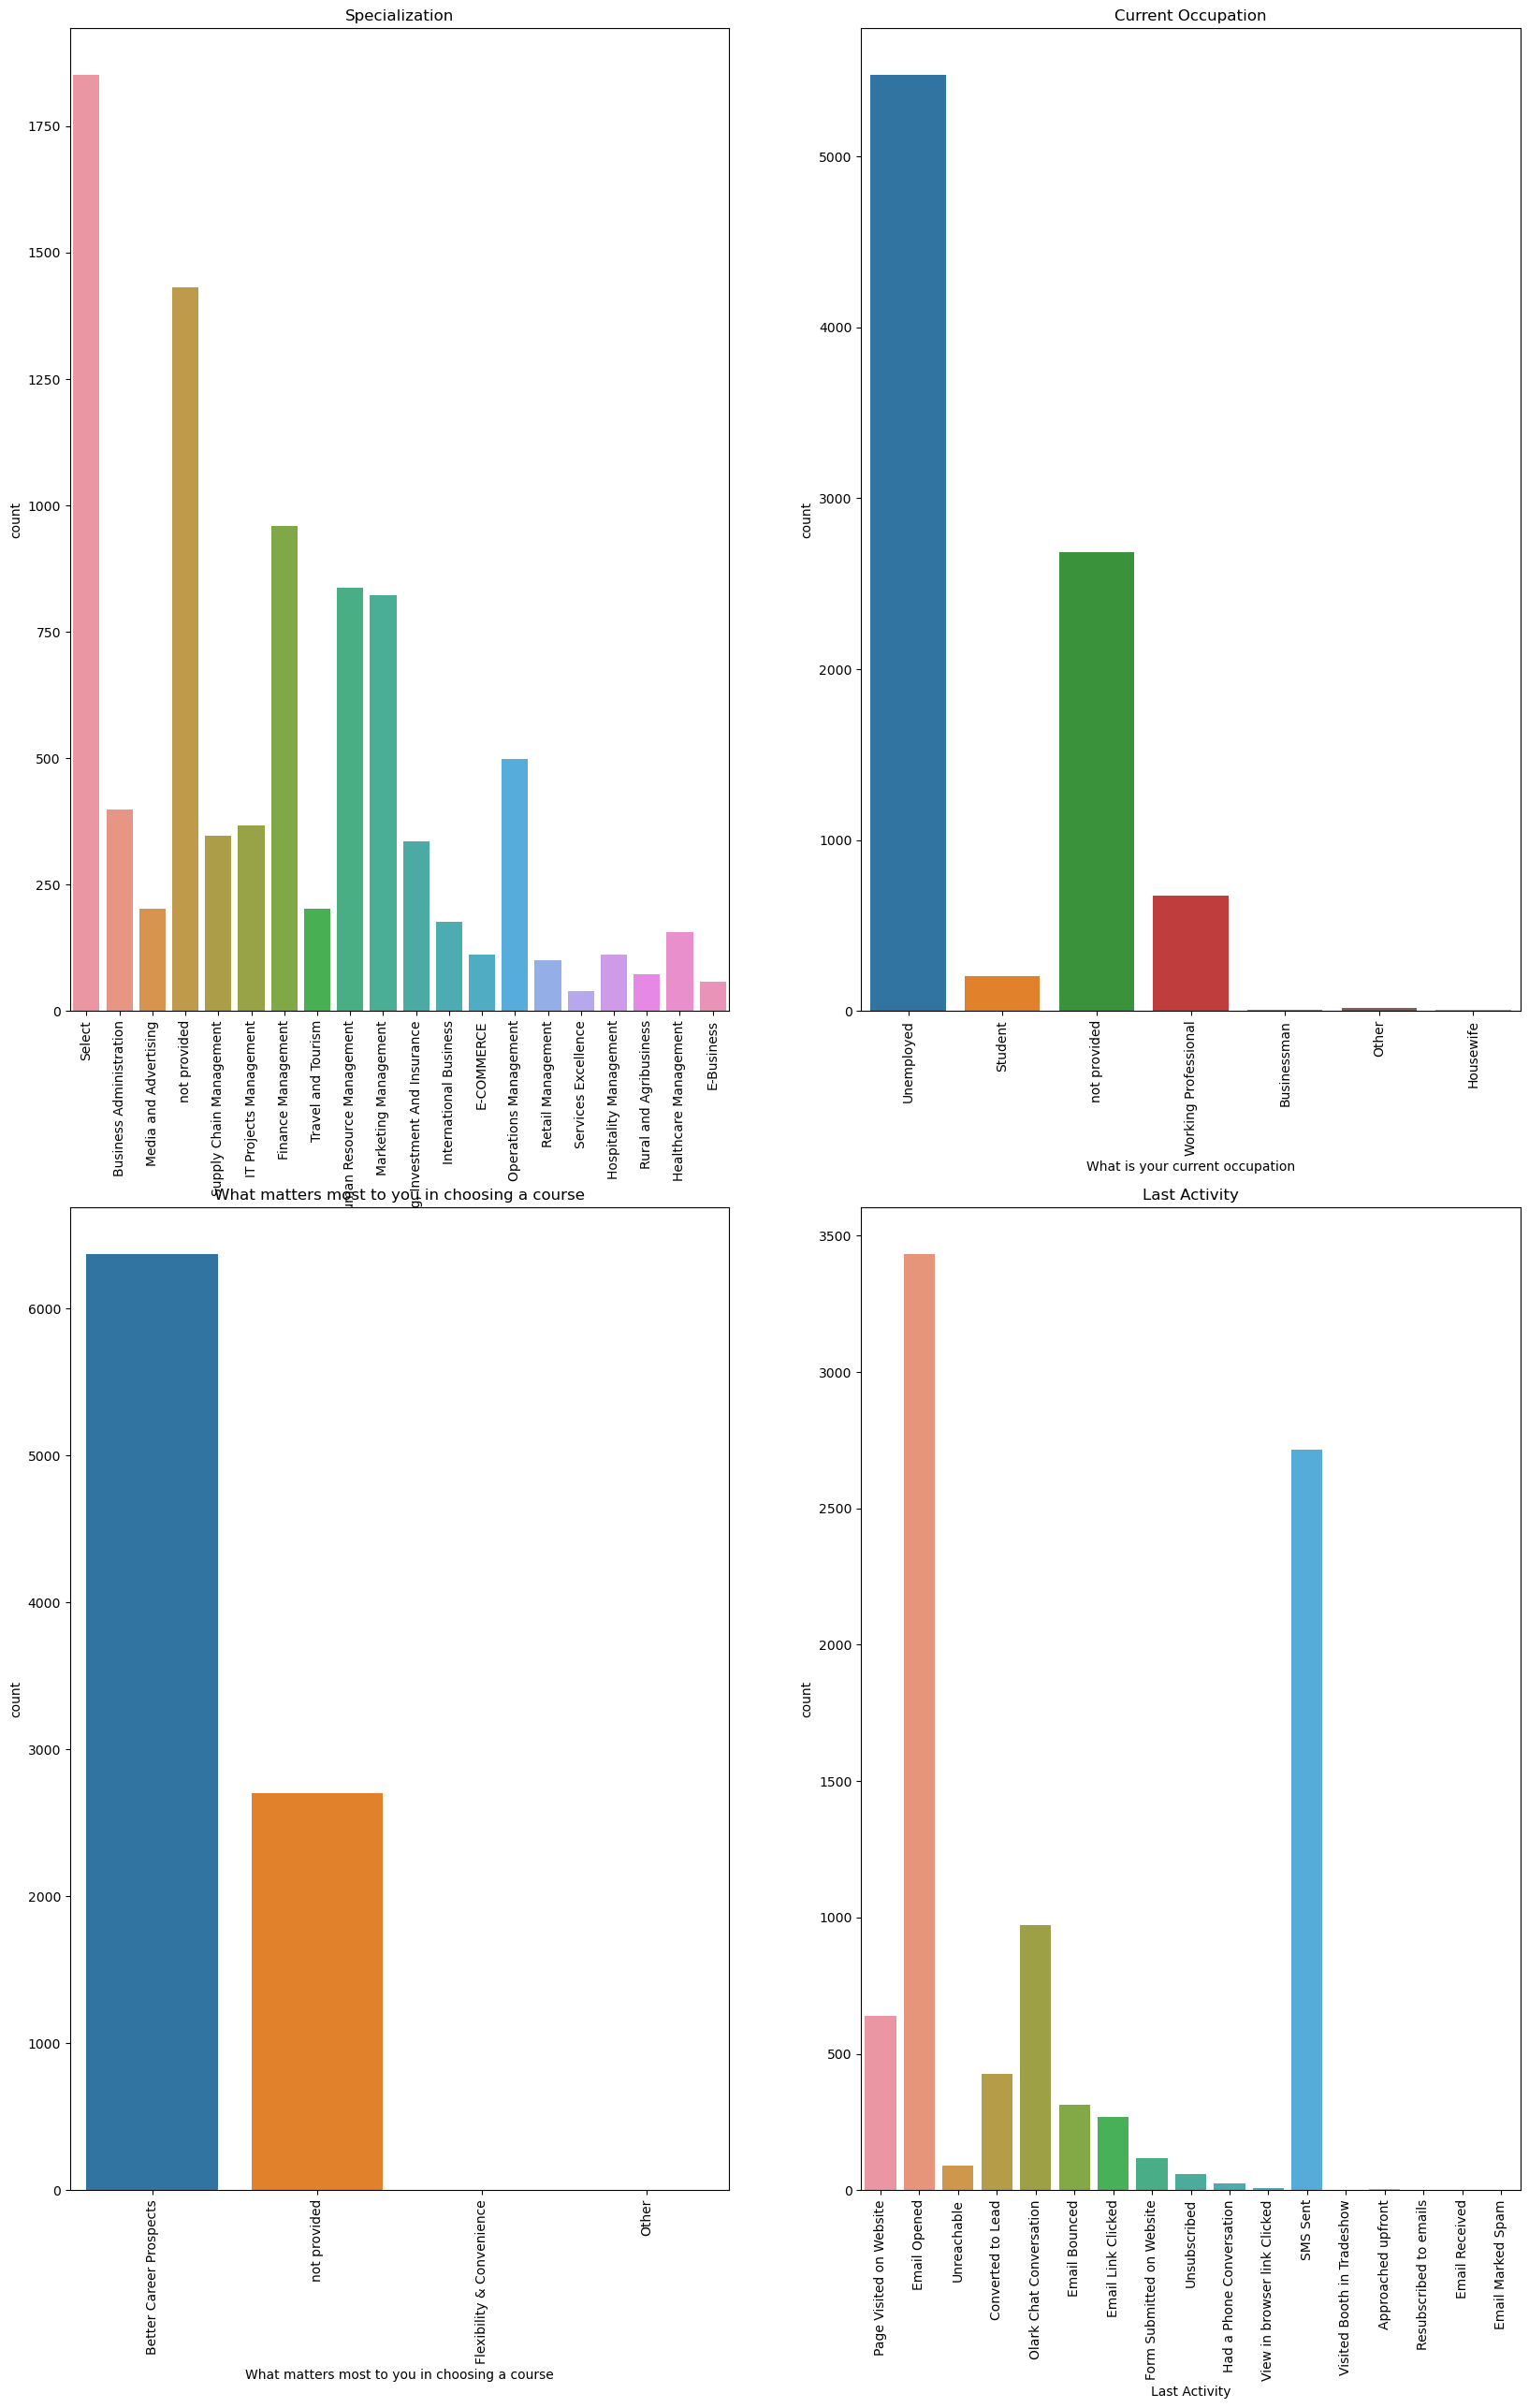

In [158]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df_F,x='Specialization').tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_F,x='What is your current occupation').tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_F,x='What matters most to you in choosing a course').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_F,x='Last Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

In [159]:
df_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

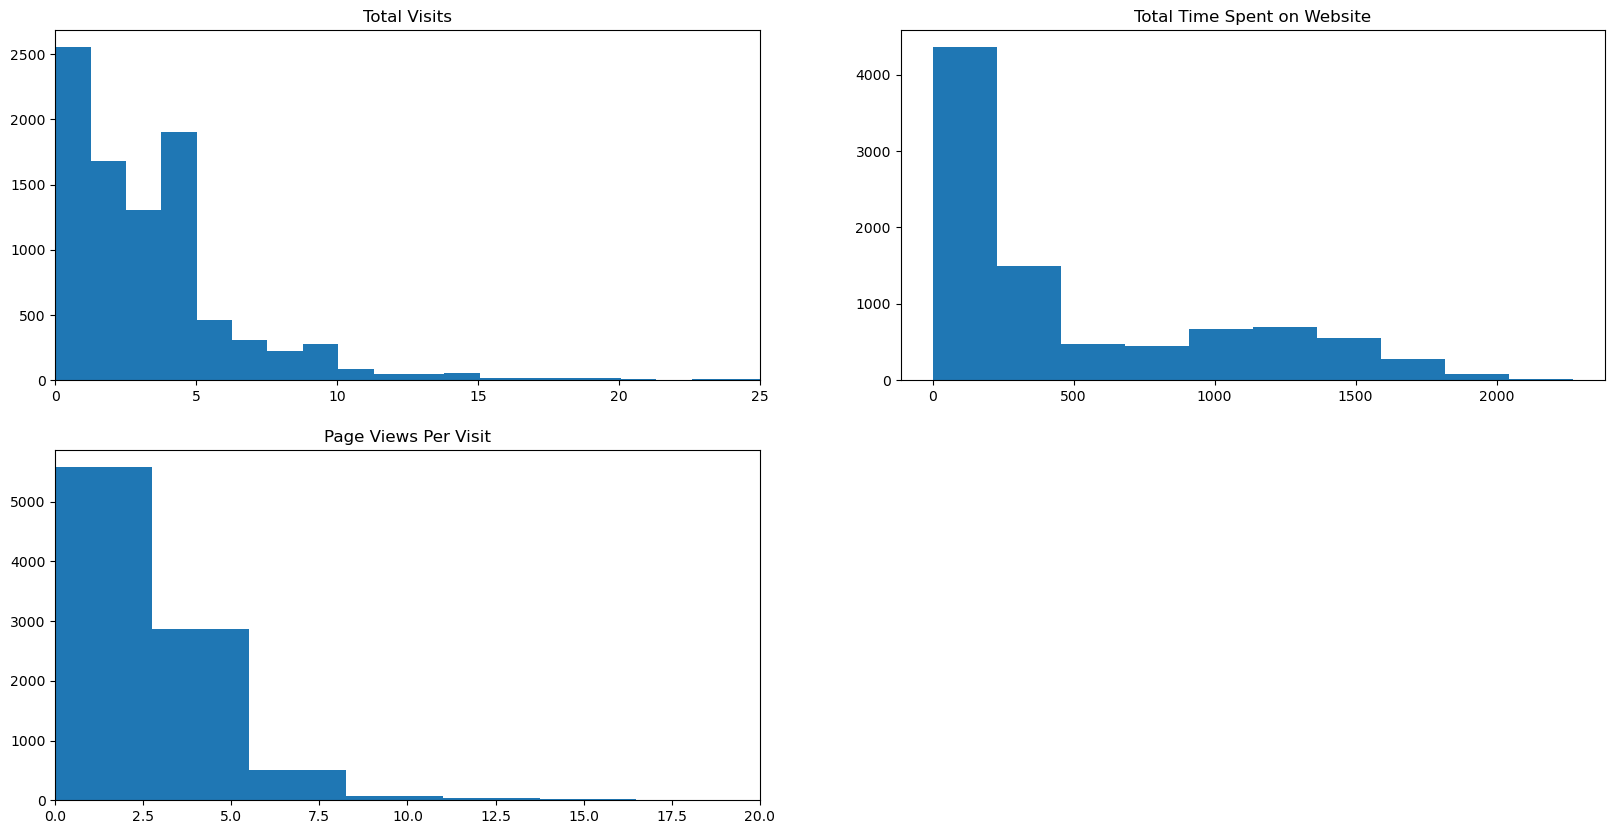

In [160]:
plt.figure(figsize = (20,10))
plt.subplot(221)
plt.hist(df_F['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_F['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_F['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## Relation of categorical variables to converted

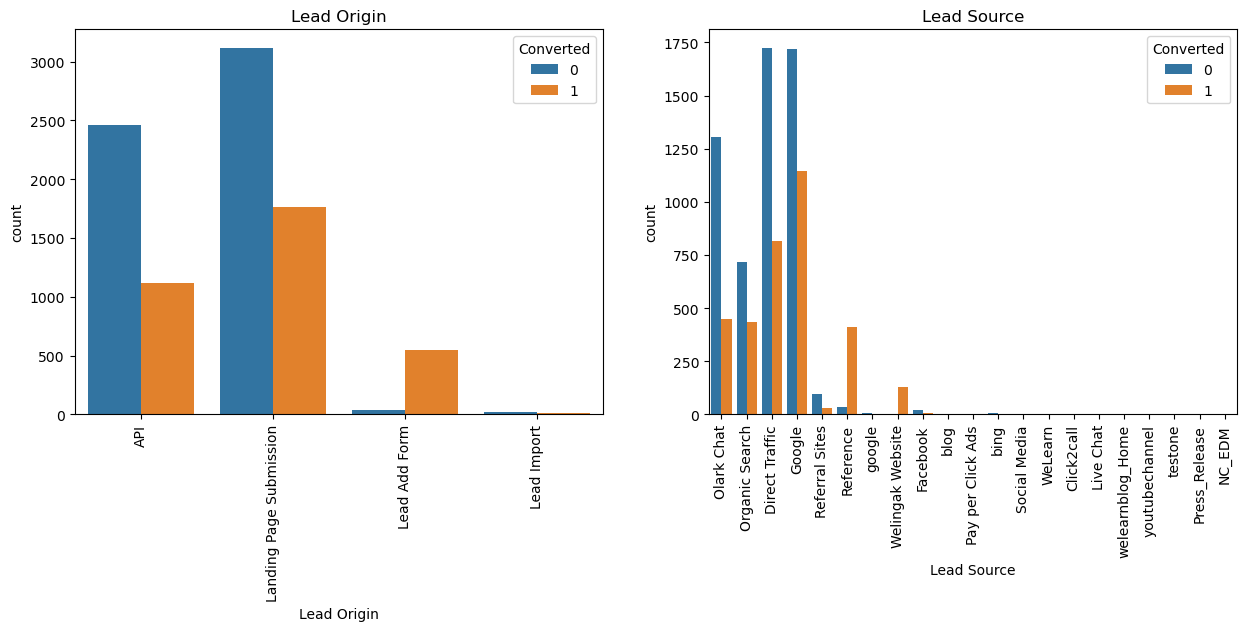

In [161]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

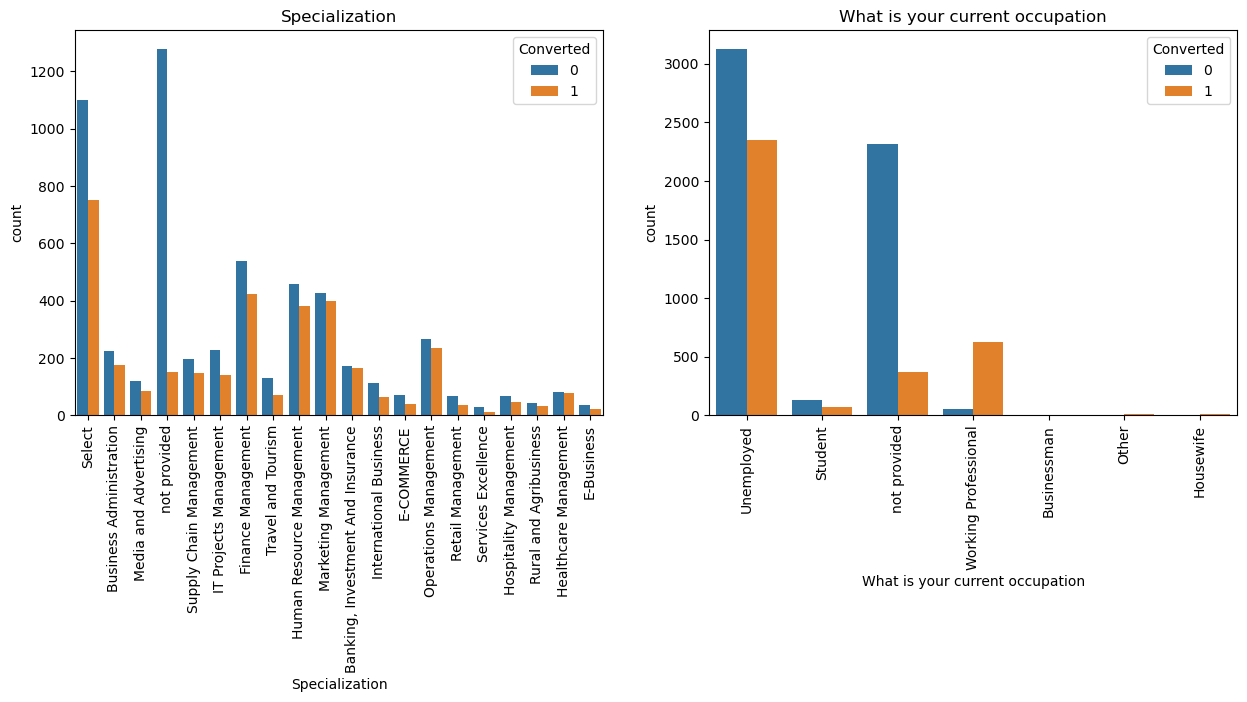

In [162]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

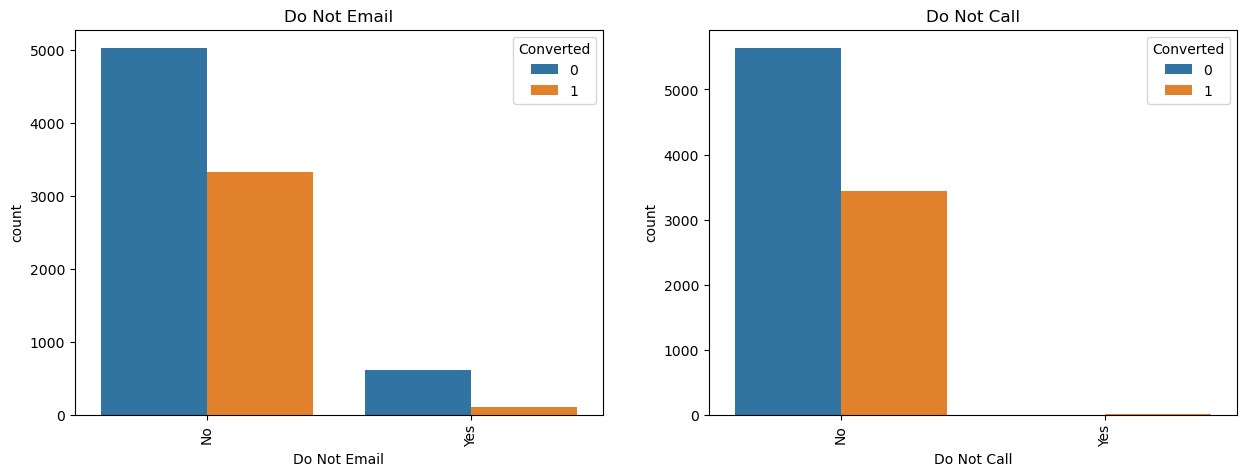

In [163]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

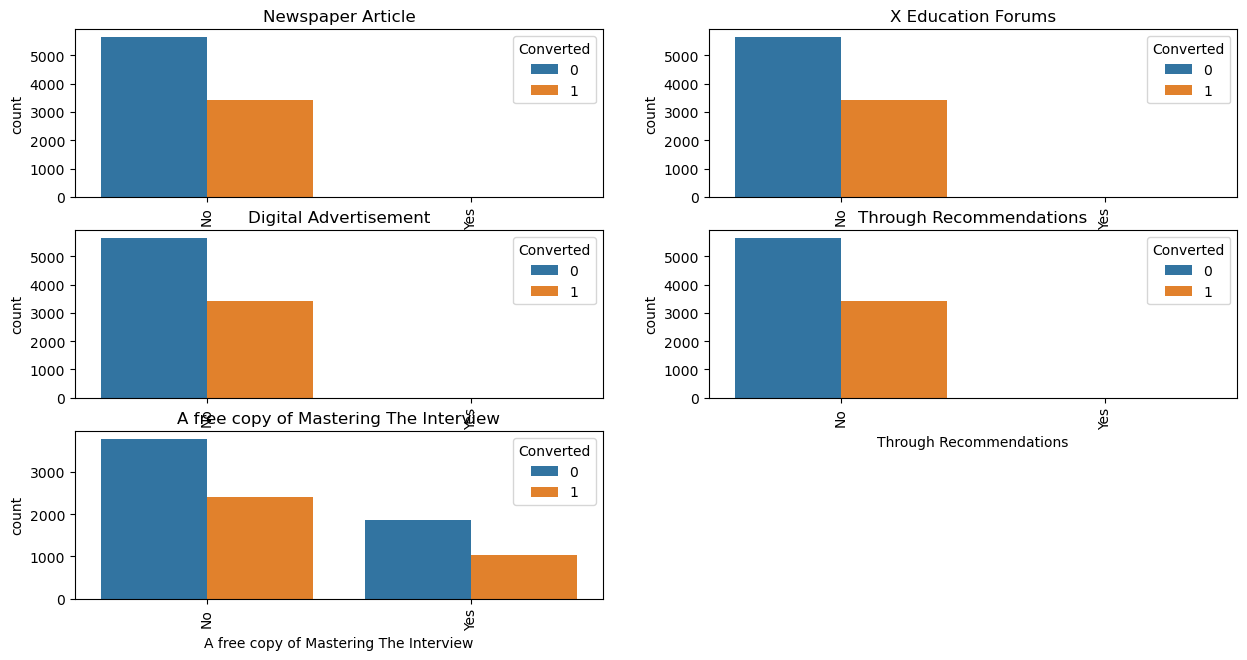

In [164]:
plt.figure(figsize = (15,10))

plt.subplot(4,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(4,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(4,2,3)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(4,2,4)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(4,2,5)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

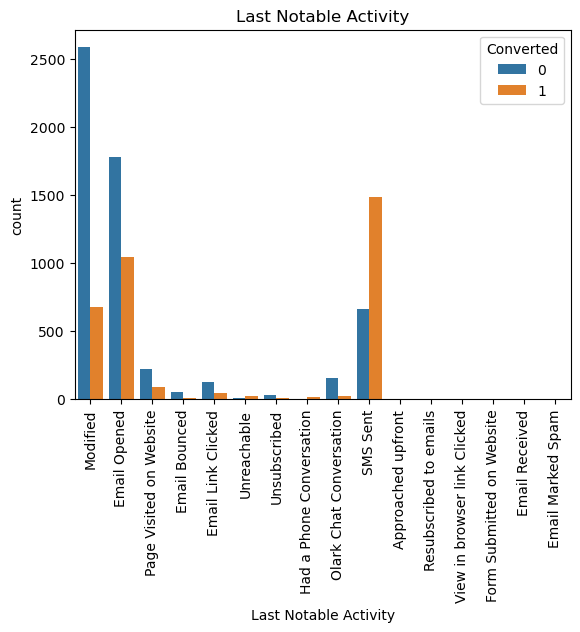

In [165]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_F).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

## Dummy Variables

In [167]:
df_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [168]:
df_F.loc[:, df_F.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [169]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_F[['Lead Origin','Lead Source', 'Do Not Email', 'Last Activity','Specialization','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Adding result to the master dataframe
df_F_dummy = pd.concat([df_F, dummy], axis=1)
df_F_dummy

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,...,0,0,0,0,0,0,0,0,0,0
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,...,0,0,0,0,0,0,1,0,0,0
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,...,0,0,0,0,0,0,1,0,0,0
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,...,0,0,0,0,0,0,1,0,0,0


In [170]:
df_F_dummy = df_F_dummy.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_F_dummy

C:\Users\5ein\AppData\Local\Temp\ipykernel_12848\2507728105.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_F_dummy = df_F_dummy.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9236,579546,0,2.0,238,2.00,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9237,579545,0,2.0,199,2.00,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,579538,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [171]:
df_F_dummy.shape

(9074, 84)

## Train test

In [172]:
#import required library
from sklearn.model_selection import train_test_split

In [173]:
X = df_F_dummy.drop(['Converted'], axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [174]:
# Keeping the target variable in y
y = df_F_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [175]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [176]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,646334,0.014184,0.612676,0.083333,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,625970,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,607128,0.042553,0.751761,0.250000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,590921,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,591639,0.014184,0.787852,0.083333,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


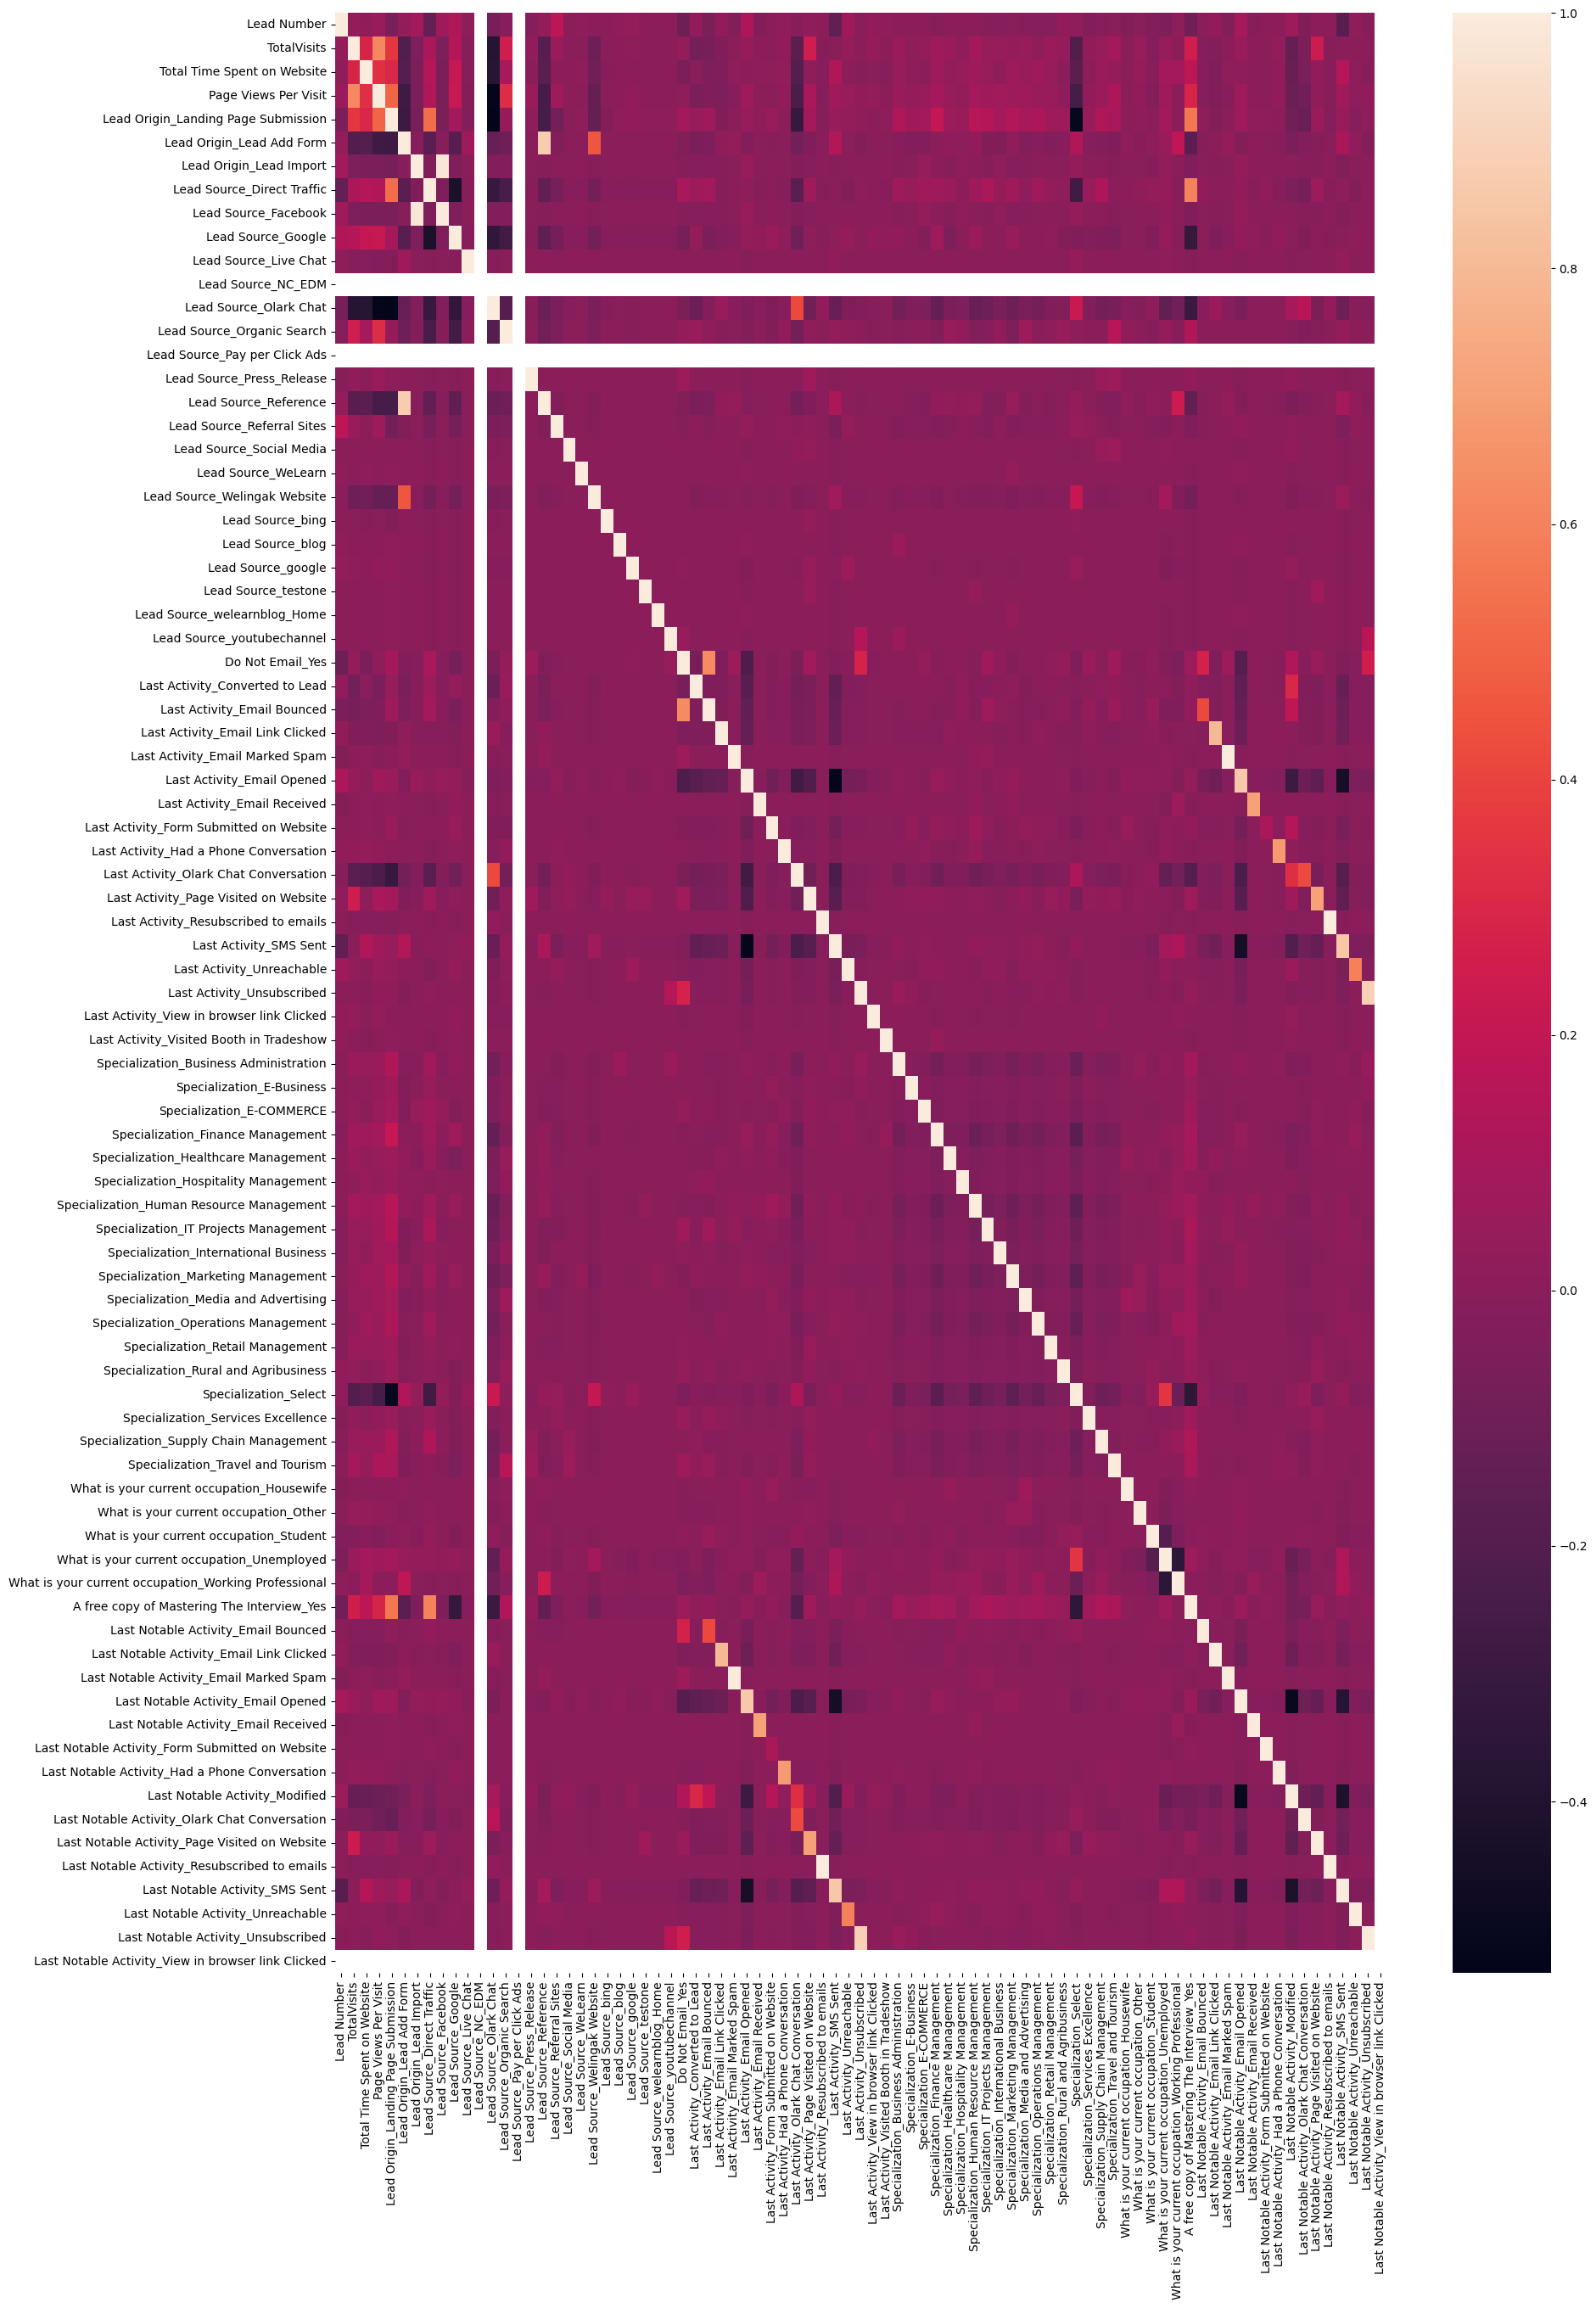

In [177]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## Model Building

In [178]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [179]:
# Import RFE
from sklearn.feature_selection import RFE

In [181]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [182]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 67),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 68),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 66),
 ('Lead Source_WeLearn', False, 55),
 ('Lead Source_Welingak Website', False, 6),
 ('Lead Source_bing', False, 54),
 ('Lead Source_blog', False, 65),
 ('Lead Source_google', False, 45),
 ('Lead Source_testone', False, 60),
 ('Lead Source_welear

In [183]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [184]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [185]:
# Importing statsmodels
import statsmodels.api as sm

In [186]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.5
Date:                Tue, 12 Mar 2024   Deviance:                       5227.1
Time:                        00:07:31   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4004
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7646      0.992     -7.830      0.000      -9.708      -5.821
Lead Number                                           8.198e-06   1.57e-06      5.235      0.000    5.13e-06    1.13e-05
Total Time Spent on Website                              4.6477      0.167     27.818      0.000       4.320       4.975
Lead Origin_Landing Page Submission                     -0.1699      0.098     -1.741      0.082      -0.361       0.021
Lead Origin_Lead Add Form                                5.2351      0.727      7.204      0.000       3.811       6.659
Lead Source_Direct Traffic                              -0.2202      0.090     -2.437      0.015      -0.397      -0.043
Lead Source_Olark Chat                                   1.2035      0.122      9.893      0.000       0.965       1.442
Lead Source_Reference                                   -1.7145      0.753     -2.278      0.023      -3.190      -0.239
Do Not Email_Yes                                        -1.0906      0.200     -5.441      0.000      -1.483      -0.698
Last Activity_Email Bounced                             -0.5834      0.386     -1.510      0.131      -1.341       0.174
Last Activity_Olark Chat Conversation                   -1.1751      0.175     -6.723      0.000      -1.518      -0.833
Last Activity_SMS Sent                                   0.7565      0.161      4.713      0.000       0.442       1.071
What is your current occupation_Unemployed               0.9479      0.082     11.577      0.000       0.787       1.108
What is your current occupation_Working Professional     3.5117      0.206     17.084      0.000       3.109       3.915
Last Notable Activity_Modified                          -0.6002      0.096     -6.283      0.000      -0.787      -0.413
Last Notable Activity_SMS Sent                           0.5816      0.181      3.209      0.001       0.226       0.937
========================================================================================================================
"""